In [7]:
import os
import pandas as pd

# 입력 파일 이름
#input_file_name = './data/ucosmos-balance.csv'
#input_file_name = './data/ujuno-balance.csv'
#input_file_name = './data/ukava-balance.csv'
input_file_name = './data/uosmo-balance.csv'

# 데이터셋 로드
df = pd.read_csv(input_file_name)

# '_time' 열을 datetime 형식으로 변환
df['_time'] = pd.to_datetime(df['_time'])

# Filter out rows where 'amountValue' is -1
df = df[df['amountValue'] != -1]

# '2023-01-27T17:00:00Z' 이전의 데이터 필터링
data = df[df['_time'] >= '2023-01-21T17:00:00Z']

# Group by 'moduleType' and 'moduleName' and calculate descriptive statistics for each group
grouped = df.groupby(['moduleType', 'moduleName'])['amountValue'].describe()

# Print the result
print(grouped)

# 파일의 기본 이름(디렉토리 없음)을 가져와서 파일 확장자 제거
base_file_name = os.path.basename(input_file_name)
base_file_name_without_extension = os.path.splitext(base_file_name)[0]

# 결과 파일이 저장될 디렉토리 정의
output_directory = './result-files/'

# 출력 파일 이름 생성
output_file_name = output_directory + base_file_name_without_extension + '.grouped_data.csv'

# Save the result to a csv file
grouped.to_csv(output_file_name)

                                    count          mean           std   
moduleType moduleName                                                   
EXCHANGE   Binance #01 (Deposit)   1607.0  6.997338e+11  2.029016e+12  \
MODULE     bonded_tokens_pool      2487.0  2.275271e+14  1.164068e+13   
           distribution            2487.0  8.408838e+13  6.336680e+12   
           fee_collector           2405.0  2.964191e+04  3.434719e+04   
           gov                     2433.0  7.217265e+09  3.337766e+09   
           mint                    2487.0  5.310000e+02  0.000000e+00   
           not_bonded_tokens_pool  2487.0  6.904963e+12  4.148782e+12   

                                            min           25%           50%   
moduleType moduleName                                                         
EXCHANGE   Binance #01 (Deposit)   5.480000e+02  2.641500e+07  9.847214e+07  \
MODULE     bonded_tokens_pool      2.130600e+14  2.158085e+14  2.276540e+14   
           distribution   

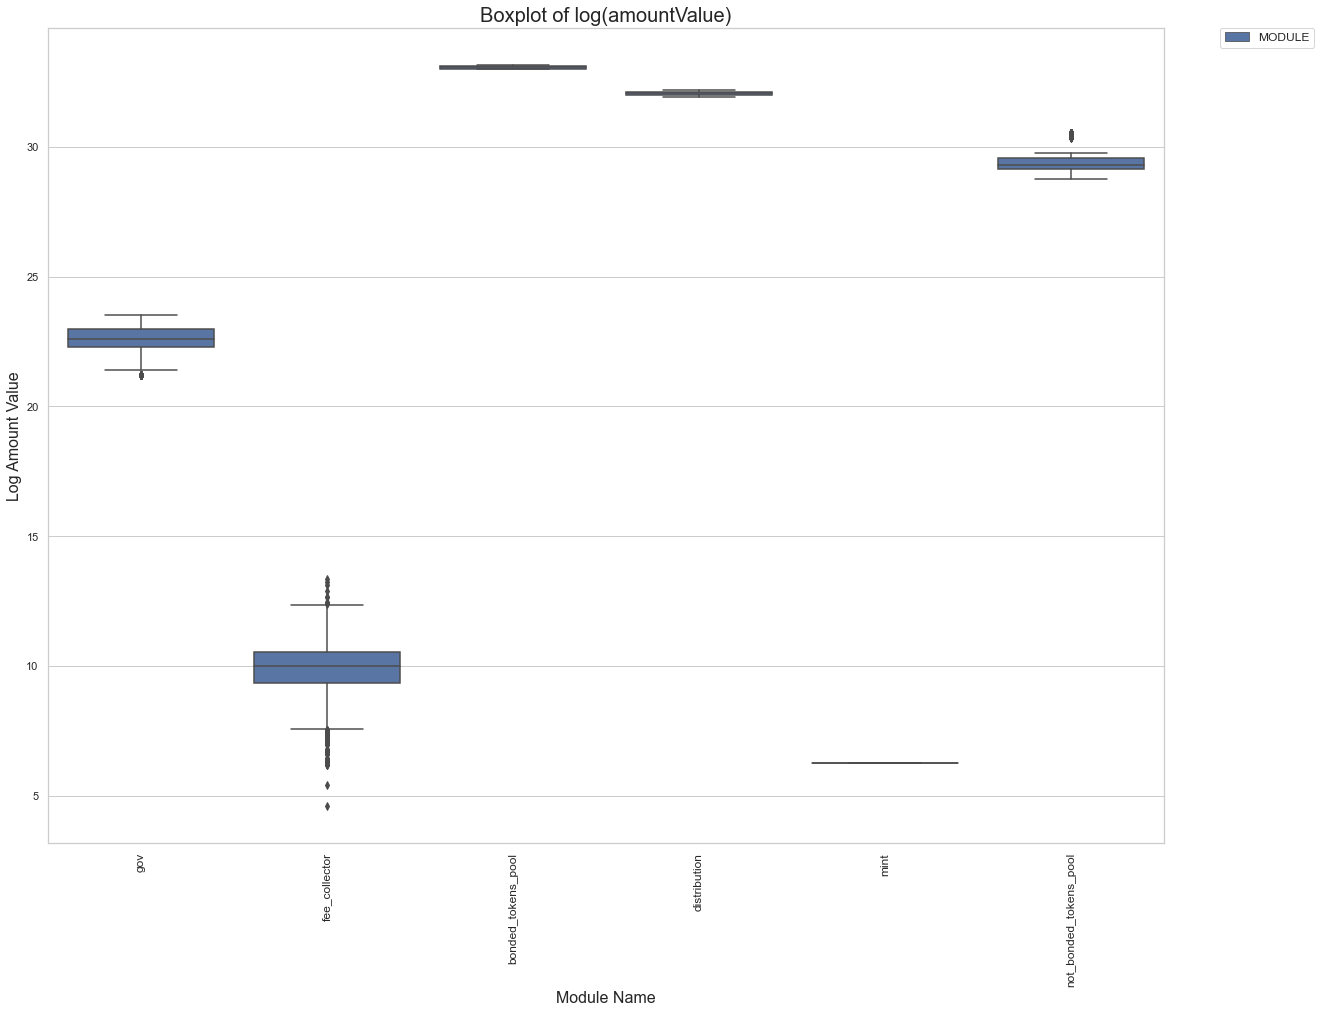

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color to white
sns.set(style="whitegrid")

# Continue with your existing code...

# Filter out moduleNames with less than 2000 amountValues
counts = df['moduleName'].value_counts()
df = df[df['moduleName'].isin(counts[counts >= 2000].index)]

# Convert amountValue to log scale
df['log_amountValue'] = np.log(df['amountValue'])

# Boxplot
plt.figure(figsize=(20,15))  # Increase the size of the figure
sns.boxplot(data=df, x='moduleName', y='log_amountValue', hue='moduleType')
plt.title('Boxplot of log(amountValue)', fontsize=20)
plt.xlabel('Module Name', fontsize=16)
plt.ylabel('Log Amount Value', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better visibility if they are long
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)  # Place legend outside plot
plt.savefig(output_directory + base_file_name_without_extension + '_boxplot.png')
plt.show()


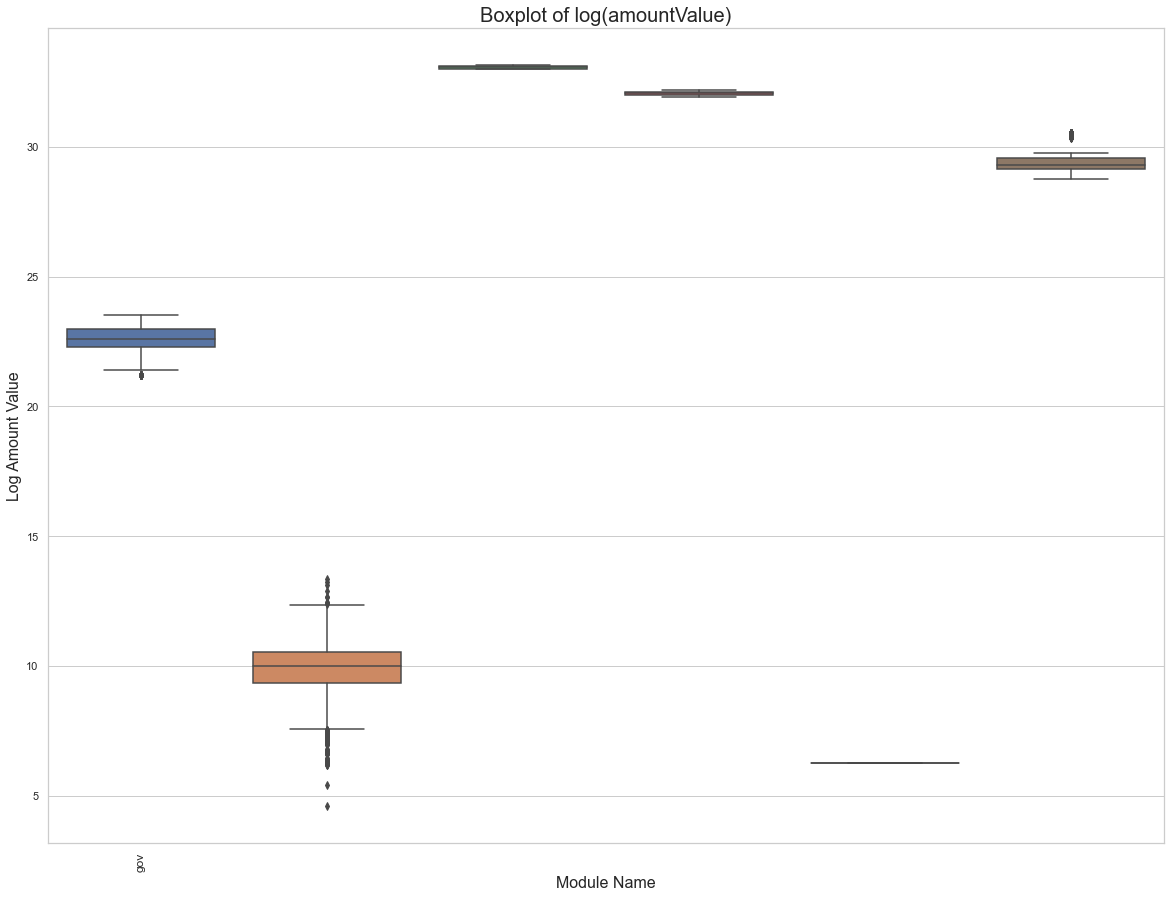

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color to white
sns.set(style="whitegrid")

# Continue with your existing code...

# Filter out moduleNames with less than 2000 amountValues
counts = df['moduleName'].value_counts()
df = df[df['moduleName'].isin(counts[counts >= 2000].index)]

# Convert amountValue to log scale
df['log_amountValue'] = np.log(df['amountValue'])

df.describe()

# Boxplot
fig, ax = plt.subplots(figsize=(20,15))  # Increase the size of the figure
sns.boxplot(data=df, x='moduleName', y='log_amountValue', ax=ax)
plt.title('Boxplot of log(amountValue)', fontsize=20)
plt.xlabel('Module Name', fontsize=16)
plt.ylabel('Log Amount Value', fontsize=16)

# Display only every nth X-axis label
n = 10  # Choose every nth label to display
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better visibility if they are long
plt.savefig(output_directory + base_file_name_without_extension + '_boxplot.png')
plt.show()


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


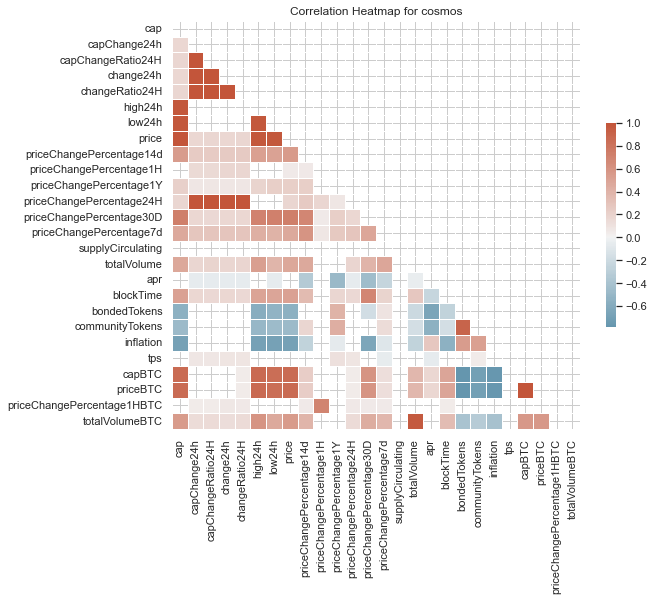

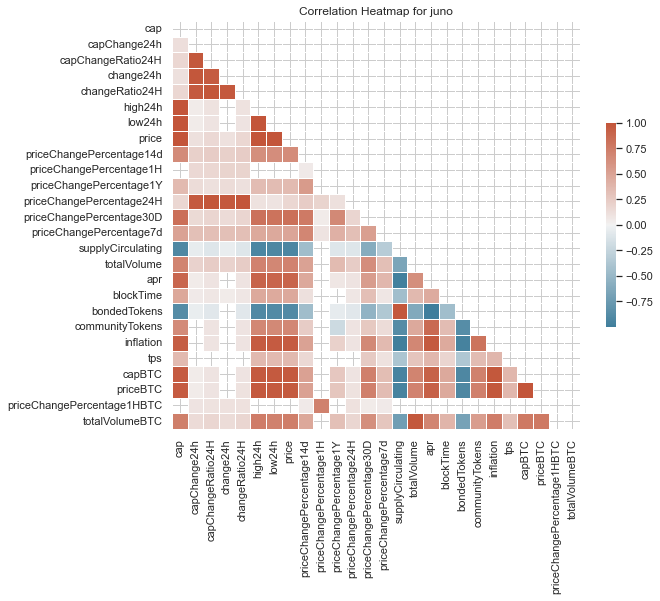

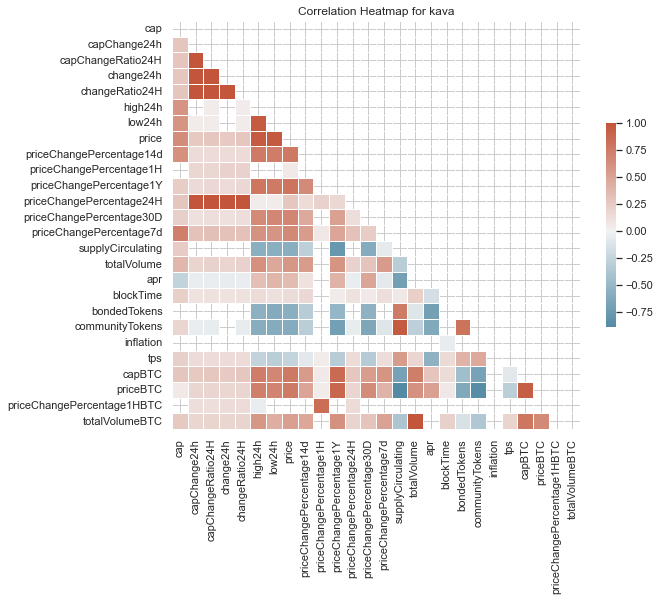

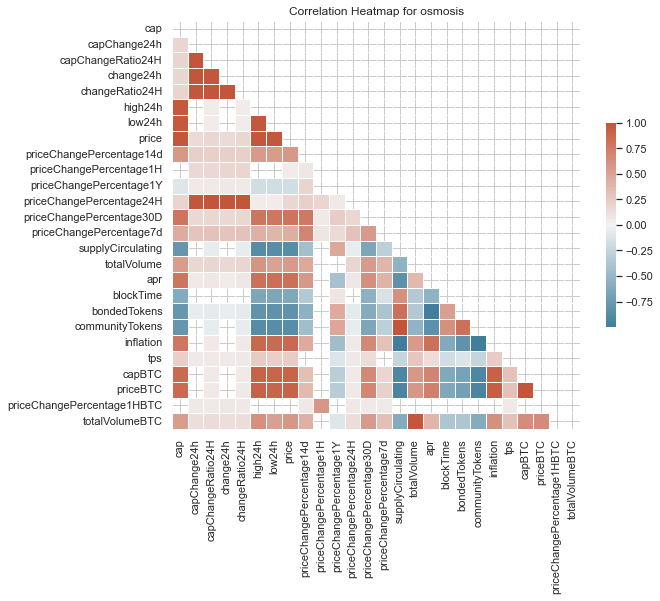

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 결과 csv 파일 불러오기
df = pd.read_csv('./result-files/market-chain.result.processed.csv')

# '_time' 열 삭제
df = df.drop(columns=['_time'])

# 고유한 체인 이름 얻기
chain_names = df['chainName'].unique()

# Create a DataFrame to store the correlation results
data = []

# 각 체인 이름별로 상관관계 히트맵 생성
for chain_name in chain_names:
    chain_df = df[df['chainName'] == chain_name]

    # 상관관계 계산 전 'chainName', 'altDate', 'athDate' 등의 열 삭제
    chain_df = chain_df.drop(columns=['chainName', 'atlDate', 'athDate', 'capRank', 'atl', 'ath', 'Unnamed: 0'])

    # 상관관계 행렬 계산
    corr = chain_df.corr()
    p_values = pd.DataFrame(index=chain_df.columns, columns=chain_df.columns)

    # 각 열 쌍에 대해 피어슨 상관계수와 p-값 계산
    for col1 in chain_df.columns:
        for col2 in chain_df.columns:
            if col1 == col2:
                p_values.loc[col1, col2] = 0  # 대각선 값
            else:
                r, p = pearsonr(chain_df[col1].dropna(), chain_df[col2].dropna())
                p_values.loc[col1, col2] = p
                # Check if correlation is greater than or equal to 0.5 or less than -0.5 and p-value is less than 0.05
                if (r >= 0.5 or r <= -0.5) and p < 0.05:
                    # Append a dictionary to the data list
                    data.append({
                        'chainName': chain_name,
                        'fig1': col1,
                        'fig2': col2,
                        'corr': r,
                        'p_values': p
                    })

    # p_values를 float 데이터타입으로 변환
    p_values = p_values.astype(float)

    # p-값이 0.05보다 큰 모든 상관관계를 NaN으로 설정
    corr[p_values > 0.05] = np.nan

    # 상관관계 행렬에서 최대 및 최소 값을 가져옵니다.
    vmin = corr.min().min()
    vmax = corr.max().max()

    # 상단 삼각형에 대한 마스크 생성
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # matplotlib 그림 설정
    f, ax = plt.subplots(figsize=(11, 9))

    # 사용자 정의 발산 컬러맵 생성
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # 마스크와 올바른 종횡비를 가진 히트맵 그리기
    # vmin과 vmax 파라미터를 사용하여 색상 바에 표시되는 값의 범위를 지정합니다.
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # 히트맵에 제목 설정
    plt.title(f'Correlation Heatmap for {chain_name}')
    
    # 그래프 여백 조정
    plt.subplots_adjust(bottom=0.25, left=0.25)
    
    # 히트맵을 PNG 파일로 저장
    plt.savefig(f'./result-files/market-heatmap.pvalue.{chain_name}.png')
    
    plt.show()

# Convert the list of dictionaries into a DataFrame
corr_results = pd.DataFrame(data)

# Save the DataFrame as a CSV file
corr_results.to_csv('./result-files/chain-market.correlation-result.csv', index=False)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


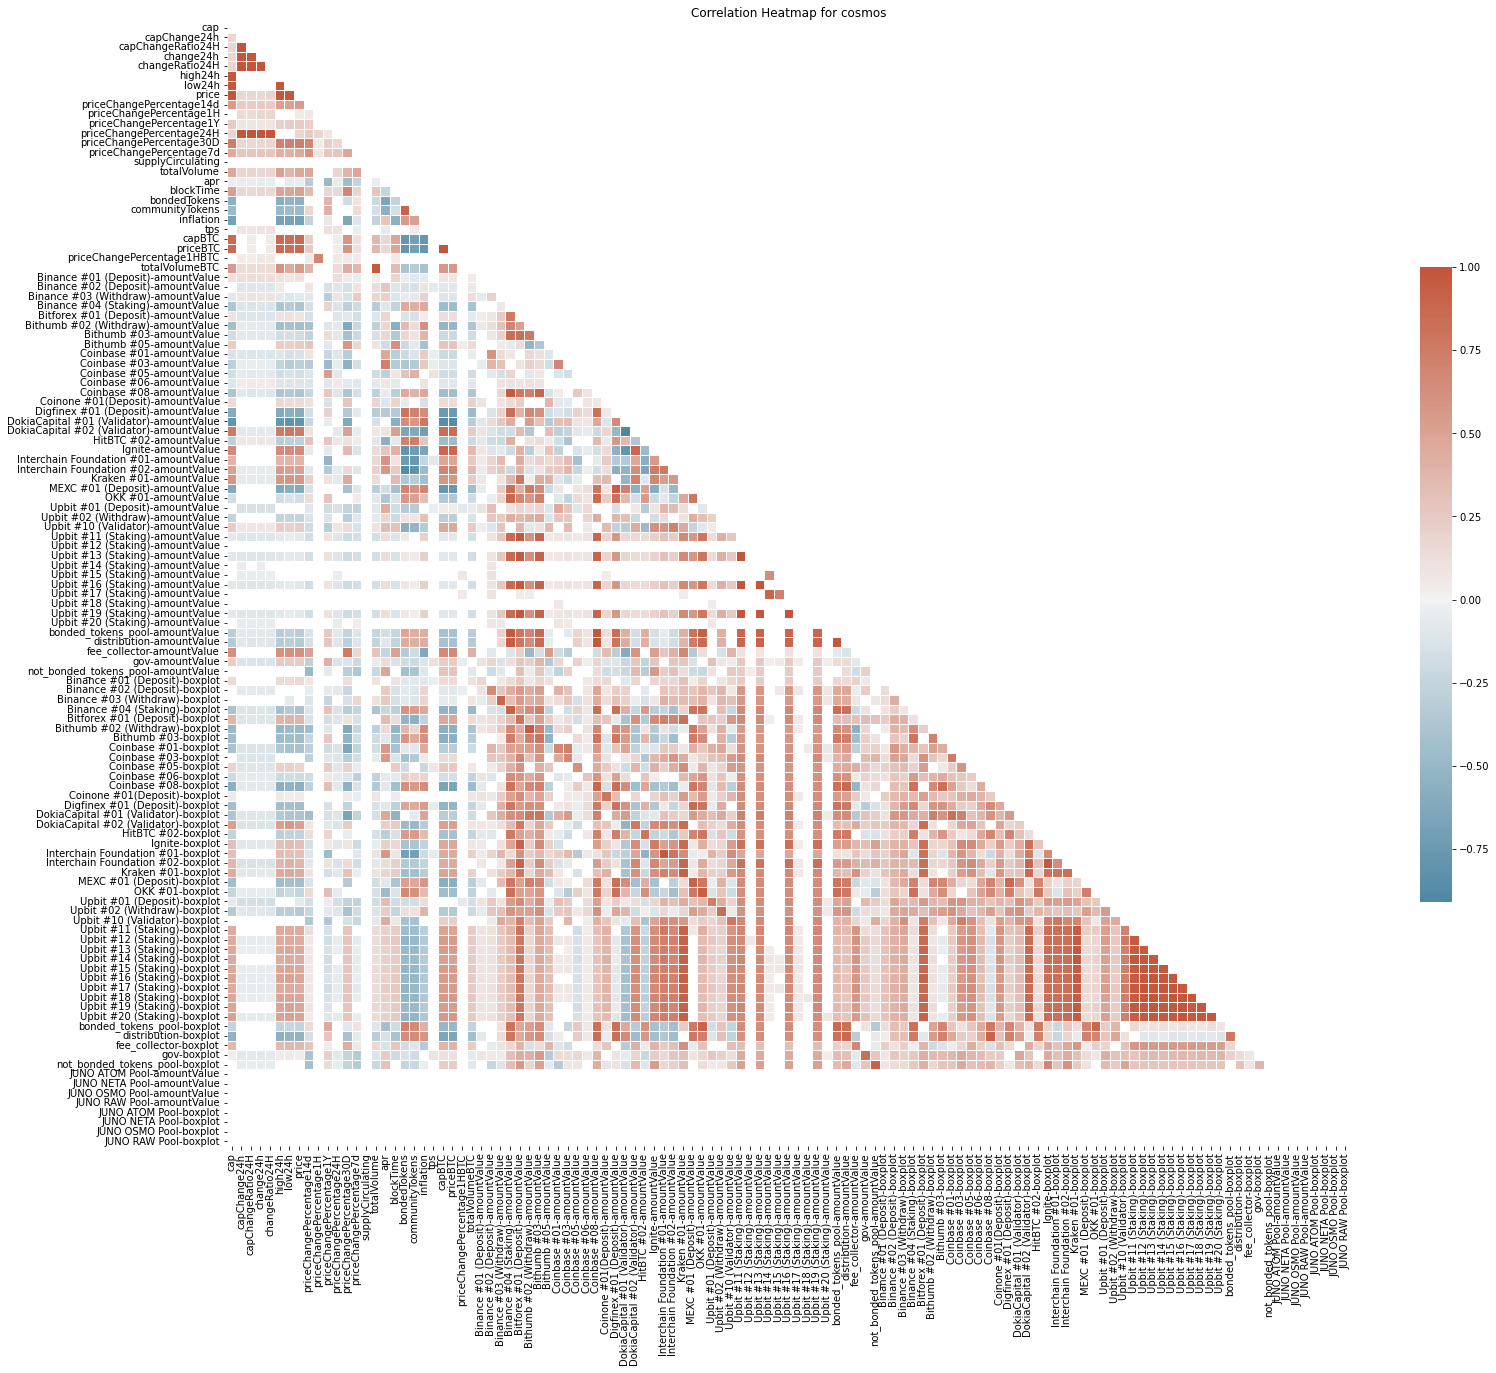

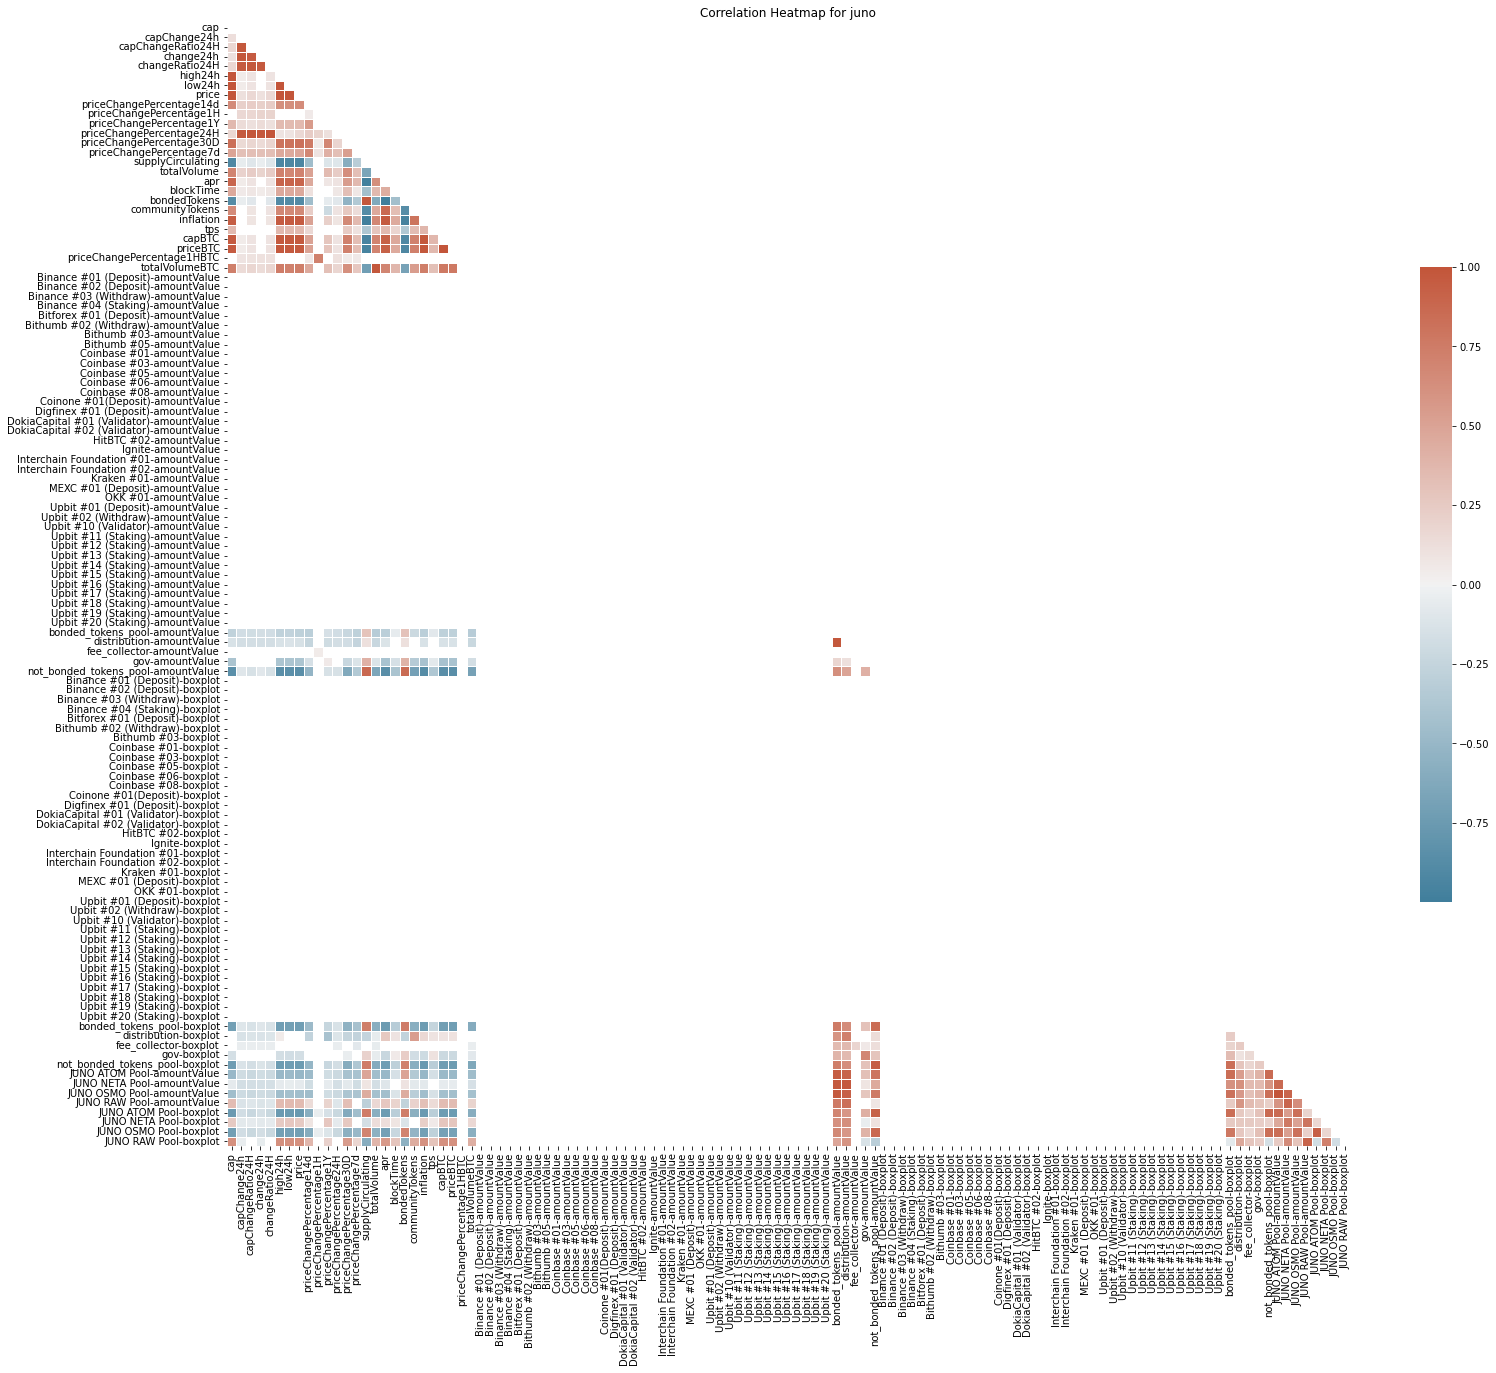

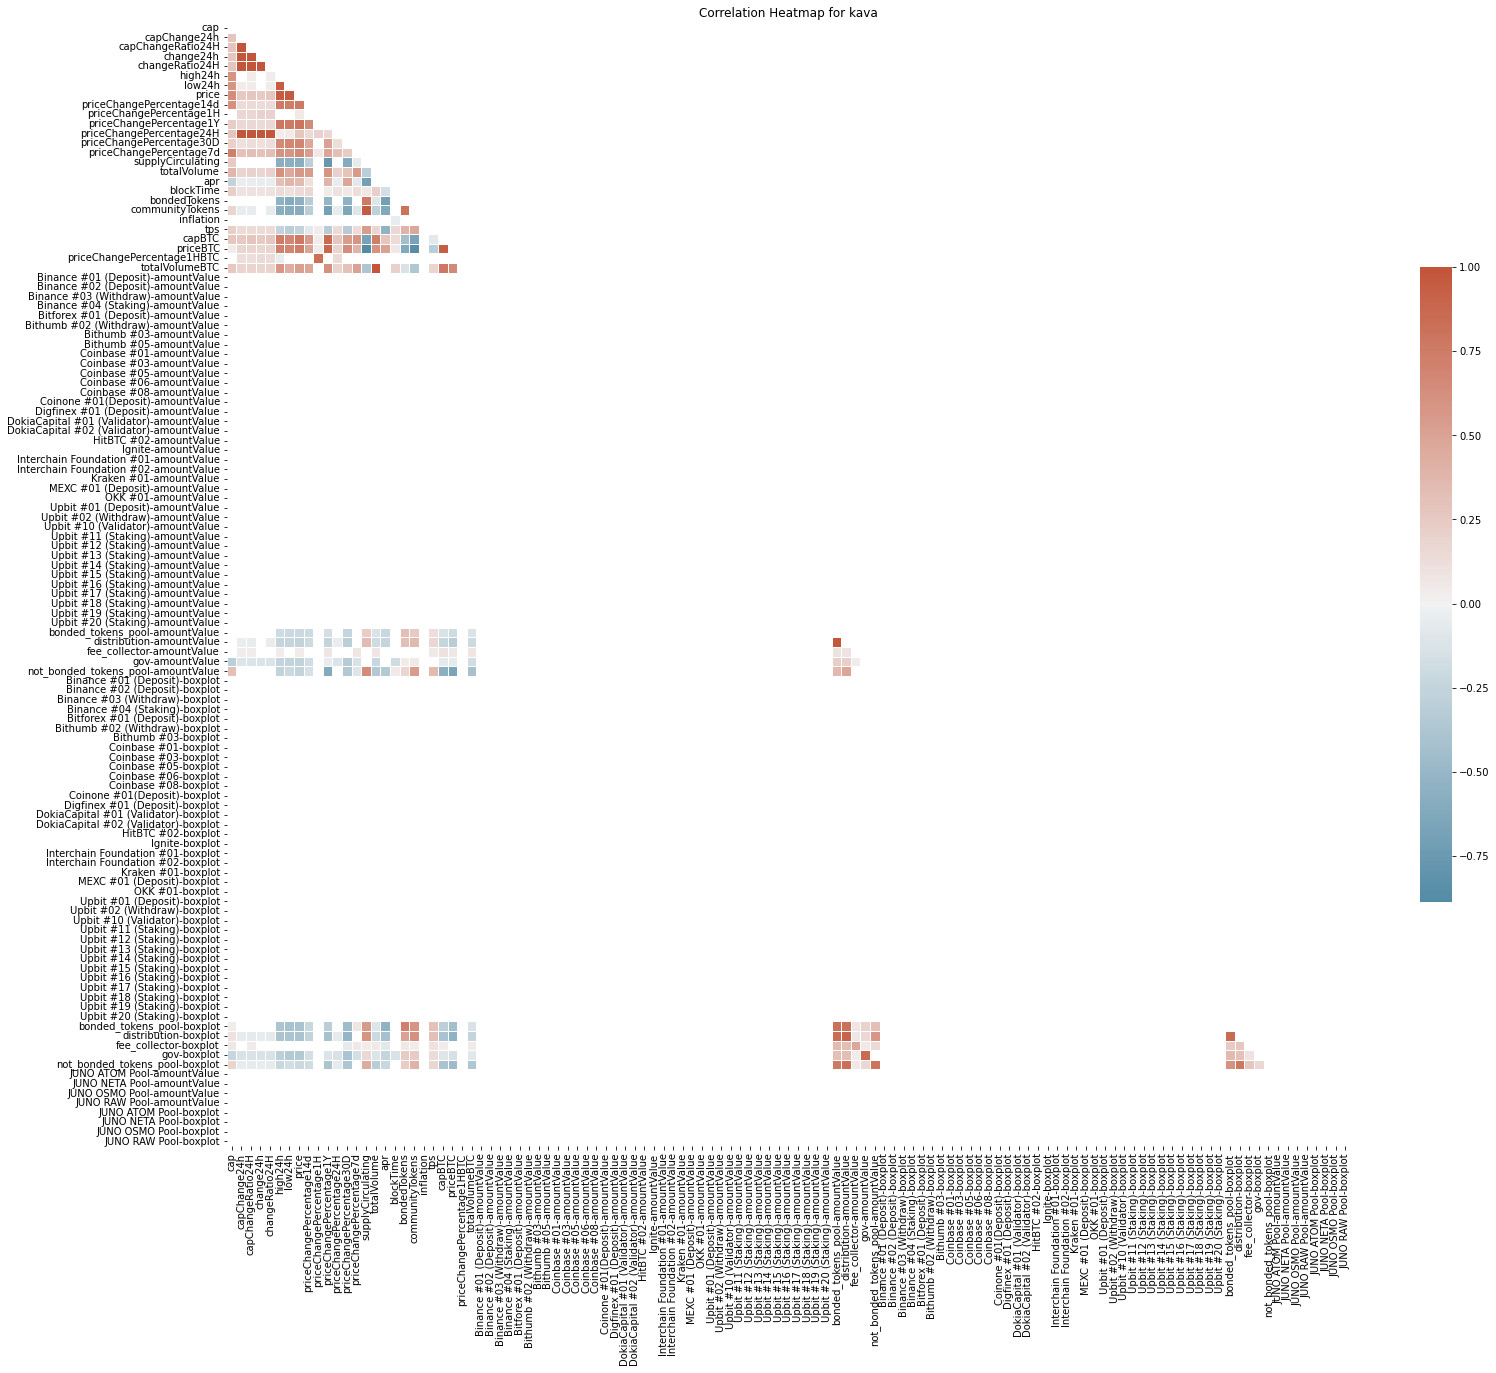

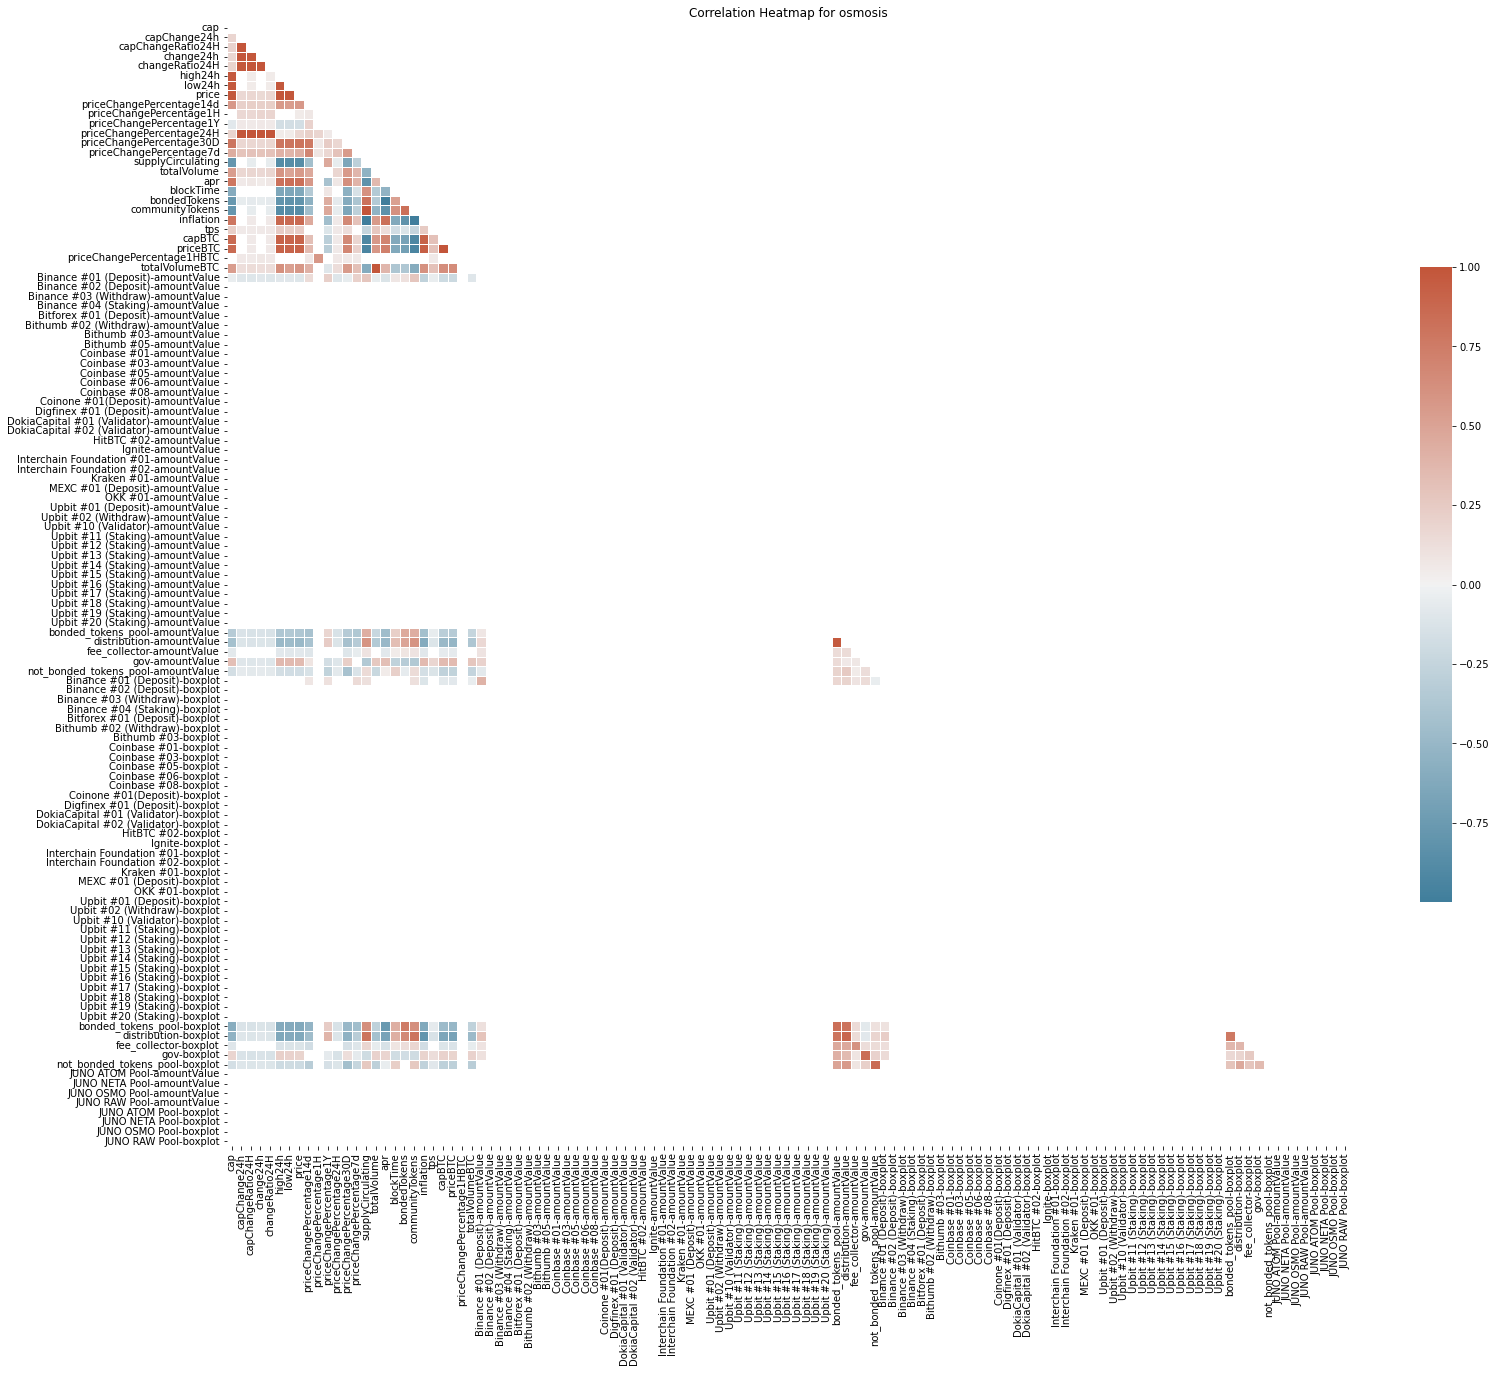

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 결과 csv 파일 불러오기
df = pd.read_csv('./result-files/market-chain-balance.result.csv')

# '_time' 열 삭제
df = df.drop(columns=['_time'])

# 고유한 체인 이름 얻기
chain_names = df['chainName'].unique()

# Create a DataFrame to store the correlation results
data = []

# 각 체인 이름별로 상관관계 히트맵 생성
for chain_name in chain_names:
    chain_df = df[df['chainName'] == chain_name]

    # 상관관계 계산 전 'chainName', 'altDate', 'athDate' 등의 열 삭제
    chain_df = chain_df.drop(columns=['chainName', 'atlDate', 'athDate', 'capRank', 'atl', 'ath', 'Unnamed: 0'])

    # 상관관계 행렬 계산
    corr = chain_df.corr()
    p_values = pd.DataFrame(index=chain_df.columns, columns=chain_df.columns)

    # Calculate Pearson's correlation coefficient and p-value for each pair of columns
    for col1 in chain_df.columns:
        for col2 in chain_df.columns:
            if col1 == col2:
                p_values.loc[col1, col2] = 0  # diagonal values
            else:
                x = chain_df[col1].dropna()
                y = chain_df[col2].dropna()
                if len(x) >=2 and len(y) >= 2:
                    r, p = pearsonr(x, y)
                    p_values.loc[col1, col2] = p
                    # Check if correlation is greater than or equal to 0.5 or less than -0.5 and p-value is less than 0.05
                    if (r >= 0.5 or r <= -0.5) and p < 0.05:
                        # Append a dictionary to the data list
                        data.append({
                            'chainName': chain_name,
                            'fig1': col1,
                            'fig2': col2,
                            'corr': r,
                            'p_values': p
                        })

    # p_values를 float 데이터타입으로 변환
    p_values = p_values.astype(float)

    # p-값이 0.05보다 큰 모든 상관관계를 NaN으로 설정
    corr[p_values > 0.05] = np.nan

    # 상관관계 행렬에서 최대 및 최소 값을 가져옵니다.
    vmin = corr.min().min()
    vmax = corr.max().max()

    # 상단 삼각형에 대한 마스크 생성
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # matplotlib 그림 설정
    f, ax = plt.subplots(figsize=(30, 28))

    # 사용자 정의 발산 컬러맵 생성
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # 마스크와 올바른 종횡비를 가진 히트맵 그리기
    # vmin과 vmax 파라미터를 사용하여 색상 바에 표시되는 값의 범위를 지정합니다.
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # 히트맵에 제목 설정
    plt.title(f'Correlation Heatmap for {chain_name}')
    
    # 그래프 여백 조정
    plt.subplots_adjust(bottom=0.25, left=0.25)
    
    # 히트맵을 PNG 파일로 저장
    plt.savefig(f'./result-files/market-balance-heatmap.pvalue.{chain_name}.png')
    
    plt.show()

# Convert the list of dictionaries into a DataFrame
corr_results = pd.DataFrame(data)

# Save the DataFrame as a CSV file
corr_results.to_csv('./result-files/chain-market-balance.correlation-result.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: './decompose/decompose-Upbit#18(Staking).png'

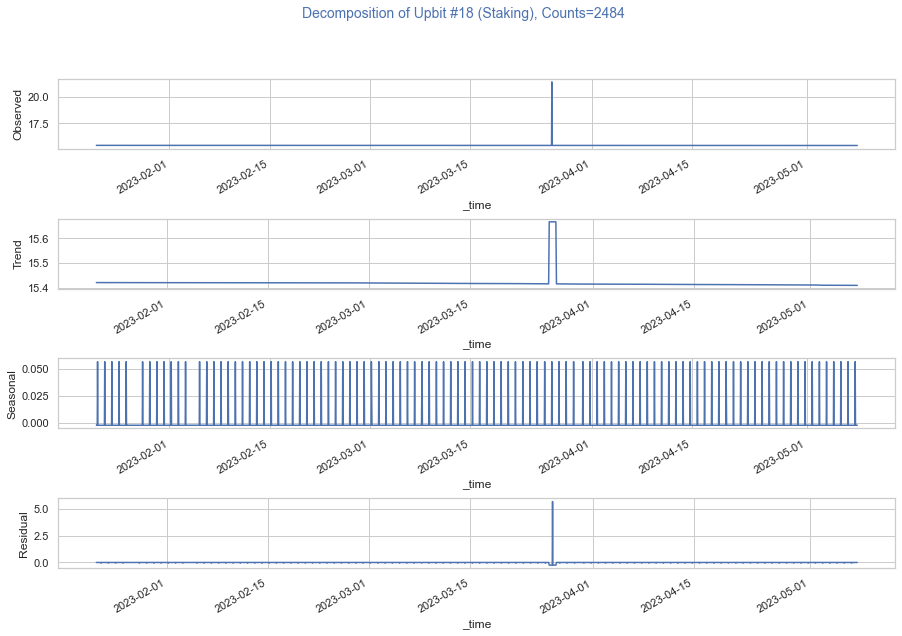

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the background color to white
sns.set(style="whitegrid")

# Assuming 'date' is your time column and 'value' is the value you want to decompose
# Replace 'data.csv' with your csv file
df = pd.read_csv('data.csv')
df['_time'] = pd.to_datetime(df['_time'])

# 데이터 전처리
df = df[df['amountValue'] != -1]
df['log_amountValue'] = np.log(df['amountValue'])
data = df[df['_time'] >= '2023-01-21T17:00:00Z']
counts = df['moduleName'].value_counts()
df = df[df['moduleName'].isin(counts[counts >= 2000].index)]

df.set_index('_time', inplace=True)

# Define a list of colors for different moduleNames
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the unique moduleNames
module_names = df['moduleName'].unique()

for i, module_name in enumerate(module_names):
    # Filter the data for the current moduleName
    mcounts = df['moduleName'].value_counts()
    module_data, mcounts = df[df['moduleName'] == module_name], mcounts[module_name]
    
    # Decompose the time series
    result = seasonal_decompose(module_data['log_amountValue'], model='additive', period=24)
    
    # Create figure and subplots
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, figsize=(15, 10))  # Adjust size here
    
    # Adjust suptitle
    fig.suptitle(f'Decomposition of {module_name}, Counts={mcounts}'
                 , fontsize=14, color=colors[i % len(colors)])

    plt.subplots_adjust(hspace=1.0)  # Adjust vertical spacing

    # Plot the components of the decomposition
    result.observed.plot(ax=ax1, legend=False, color=colors[i % len(colors)])
    ax1.set_ylabel('Observed')
    result.trend.plot(ax=ax2, legend=False, color=colors[i % len(colors)])
    ax2.set_ylabel('Trend')
    result.seasonal.plot(ax=ax3, legend=False, color=colors[i % len(colors)])
    ax3.set_ylabel('Seasonal')
    result.resid.plot(ax=ax4, legend=False, color=colors[i % len(colors)])
    ax4.set_ylabel('Residual')
    
    # Save the figure to a file
    module_name_no_spaces = module_name.replace(' ', '')
    plt.savefig(f'/decompose/decompose-{module_name_no_spaces}.png')
    
plt.show()
